#Assignment 2: Canny Edge Detection

Import required libraries here.

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
from skimage.metrics import structural_similarity as ssim
#import skimage.exposure 

Import the image(s) here.

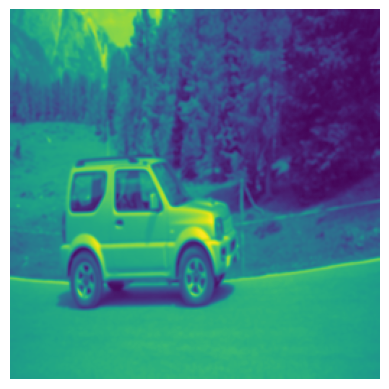

In [12]:
input_image = cv2.imread('1.png')
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
input_image = cv2.GaussianBlur(input_image, (3, 3), 0)
plt.axis('off')
plt.imshow(input_image)

Write the code for Sobel filter here.

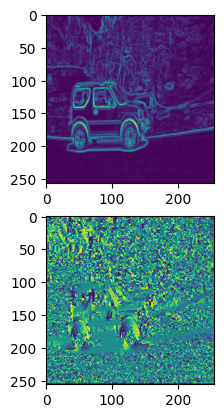

In [22]:
def SobelFilter(image):
#Manually considered filter2D provides nearly 0.43 accuracy only
    # Kx=np.array([[-1,0,1],
    #             [-2,0,2],
    #             [-1,0,1]])
    # Ky=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    # Ix=cv2.filter2D(image,-1,Kx)
    # Iy=cv2.filter2D(image,-1,Ky)
    # #magnitude
    # Conv=np.hypot(Ix,Iy)
    # Conv=Conv/Conv.max()*255
    # #angle
    # angle = np.arctan2(Iy, Ix)
    # angle=angle*(180/np.pi)%180

    Ix = cv2.Sobel(image, cv2.CV_64F, 1, 0)
    Iy = cv2.Sobel(image, cv2.CV_64F, 0, 1)
    
    Conv = np.sqrt((Ix ** 2) + (Iy ** 2))
    angle = np.arctan2(Iy, Ix) * (180 / np.pi) % 180
    return (Conv, angle)

mag,ang=SobelFilter(input_image)
plt.subplot(211)
plt.imshow(mag)
plt.subplot(212);plt.imshow(ang)


Write the code for non-maximum supression here.

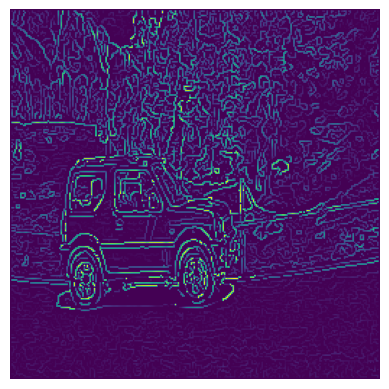

In [23]:
def non_maximum_supression(image, angle):
    M, N = image.shape
    suppressed = np.zeros((M,N), dtype= np.uint8)

    for i in range(1,M-1):
        for j in range(1,N-1):
            #Horizontal 0
            if(0<=angle[i,j]<22.5)or(157.5<=angle[i,j]<=180)or(-22.5<=angle[i,j]<0)or(-180<=angle[i,j]<-157.5):
                b=image[i,j+1]
                c=image[i,j-1]
            #Diagonal 45
            elif(22.5<=angle[i,j]<67.5)or(-157.5<=angle[i,j]<-112.5):
                b=image[i+1,j+1]
                c=image[i-1,j-1]
            #Vertical 90
            elif(67.5<=angle[i,j]<112.5)or(-112.5<=angle[i,j]<-67.5):
                b=image[i+1,j]
                c=image[i-1,j]
            #Diagonal 135
            elif(112.5<=angle[i,j]<157.5)or(-67.5<=angle[i,j]<-22.5):
                b=image[i+1,j-1]
                c=image[i-1,j+1]
            #Non-max Suppression
            if(image[i,j]>= b)and(image[i,j]>=c):
                suppressed[i,j]=image[i,j]
            else:
                suppressed[i,j]=0
    return suppressed
k= non_maximum_supression(mag,ang)
plt.axis('off')
plt.imshow(k)

Write the code for hysteresis thresholding here.

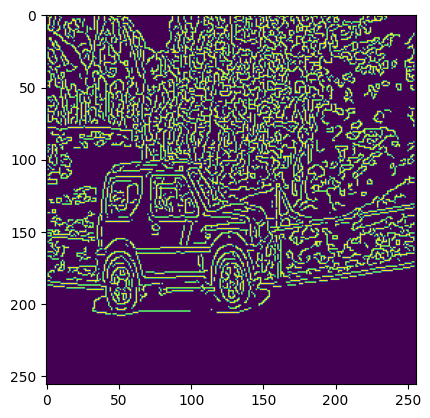

In [24]:
def hysteresis_thresholding(image, low, high):
     M, N = image.shape
     result = np.zeros((M,N), dtype= np.uint8)

    # If edge intensity is greater than 'High' it is a sure-edge
     strong_i, strong_j = np.where(image >= high)
     result[strong_i, strong_j] = 255
     # below 'low' threshold, it is a sure non-edge
     #default:
     #zeros_i, zeros_j = np.where(image < low) 
     #result[zeros_i, zeros_j ] = 0
     strong =255
     weak=20
    # weak edges
    # Set same intensity value for all edge pixels
     weak_i, weak_j = np.where((image < high) & (image >= low)) 
     result[weak_i, weak_j] = weak
         
     M, N = result.shape
     for i in range(1, M-1):
        for j in range(1, N-1):
            if (result[i,j] == weak):
                if strong in [result[i+1, j-1],result[i+1, j],result[i+1, j+1],result[i, j-1],result[i, j+1],result[i-1, j-1],result[i-1, j],result[i-1, j+1]]:
                   result[i, j] = strong
                else:
                    result[i, j] = 0
     return result
imgaf=hysteresis_thresholding(k,15,35)
plt.imshow(imgaf)

After writing the above functions, the final Canny edge detection function is provided below.

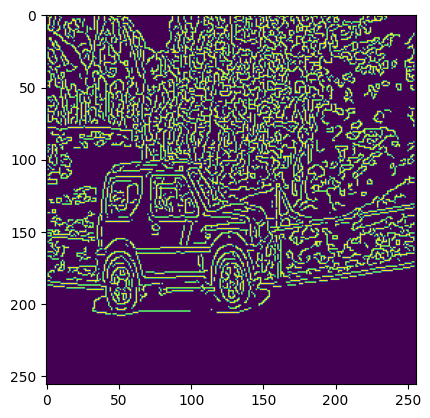

In [25]:
def canny_edge_detection(image, low, high):
    sobel_image, angle = SobelFilter(image)
    non_maximum_image = non_maximum_supression(sobel_image, angle)
    canny_edge_image = hysteresis_thresholding(non_maximum_image, low, high)
    return sobel_image, non_maximum_image, canny_edge_image
sobel_image,non_maximum_image,canny_edge_image=canny_edge_detection(input_image,15,35)
plt.imshow(canny_edge_image)

Write a code for Canny edge detection using inbuilt commands.



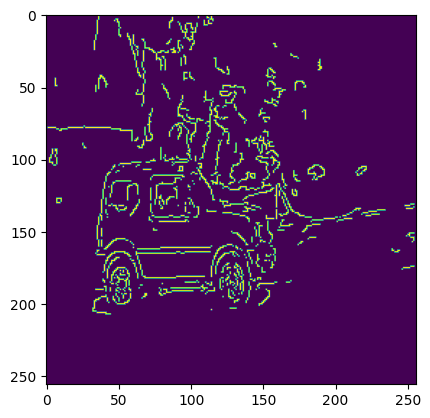

In [26]:
median_pix = np.median(input_image) 
lower = int(max(0 ,0.7*median_pix))
upper = int(min(255,1.3*median_pix))
edges = cv2.Canny(image=input_image, threshold1=lower,threshold2=upper)
plt.imshow(edges)
sobel_image,non_maximum_image,canny_edge_image=canny_edge_detection(input_image,lower,upper)
plt.imshow(canny_edge_image)

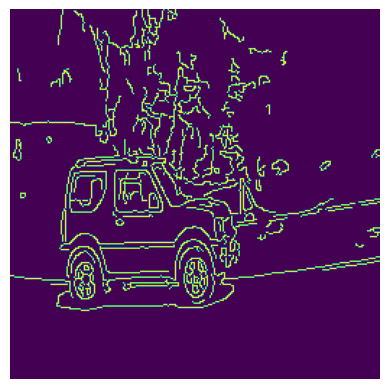

In [27]:
def canny(image):
    canny_image=cv2.Canny(image,lower,upper,L2gradient=True)
    return canny_image
plt.axis('off')
x=canny(input_image)
plt.imshow(x)

def canny(image):
    canny_image=cv2.Canny(image,100,200)
    return canny_image
plt.imshow(canny(input_image))
x=canny(input_image,)

Plot the original image, Sobel edge image, edges after non maximum supression, and Canny edge image with self written code and inbuilt command here.

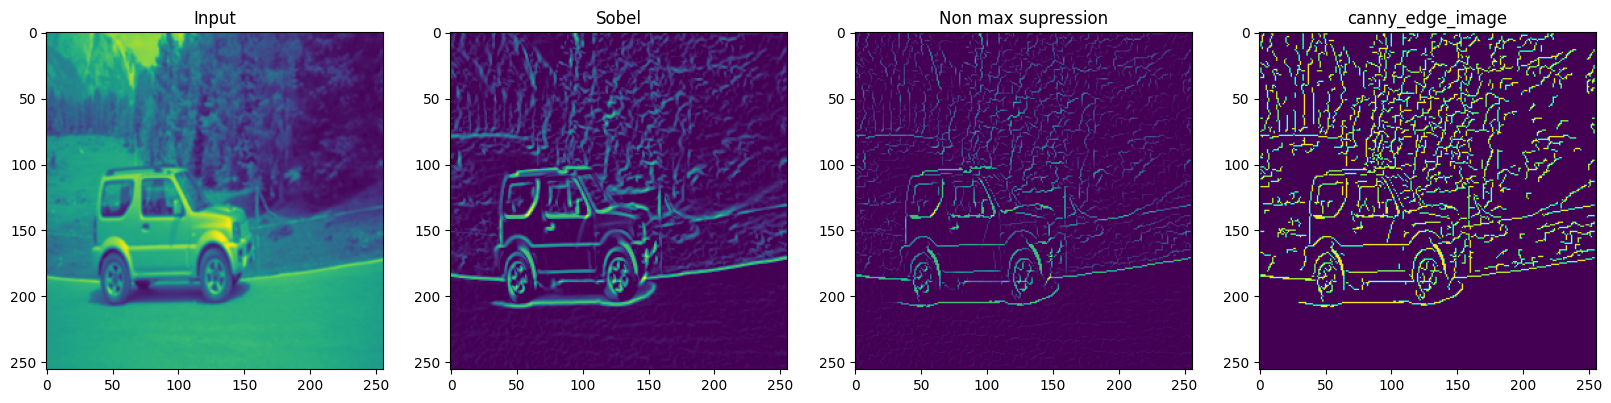

In [19]:
f,(x1,x2,x3,x4)=plt.subplots(1,4,figsize=(20,10))
x1.set_title('Input')
x1.imshow(input_image)
x2.set_title('Sobel')
x2.imshow(sobel_image)
x3.set_title('Non max supression')
x3.imshow(non_maximum_image)
x4.set_title('canny_edge_image')
x4.imshow(canny_edge_image)


Manual Approach using convolution

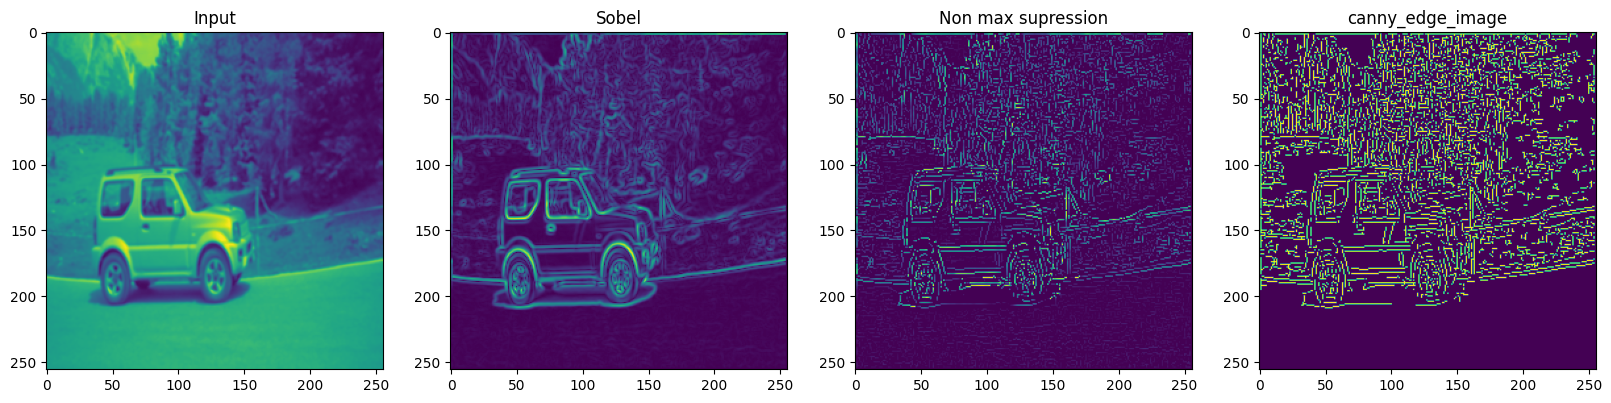

In [36]:
def conv_t(image):
  img_c=image.copy()
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      img_c[i][j]=image[image.shape[0]-1-i][image.shape[1]-j-1]
  return img_c

def conv(image,kernel):
  # kernel=conv_t(kernel)
  img_a=image.shape[0]
  img_b=image.shape[1]
  k_a=kernel.shape[0]
  k_b=kernel.shape[1]
  h=k_a//2
  w=k_b//2
  img_conv=np.zeros(image.shape)
  for i in range(h,img_a-h):
    for j in range(w,img_b-w):
      sum=0
      for m in range(k_a):
        for n in range(k_b):
          sum=sum+kernel[m][n]*image[i-h-k_a//2+m][j-w-k_b//2+n]
      img_conv[i][j]=sum
  return img_conv

def sobel_filters_manual(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    
    Ix = conv(img, Kx)
    Iy = conv(img, Ky)
    
    G = np.sqrt((Ix ** 2) + (Iy ** 2))
    theta = np.arctan2(Iy, Ix)* (180 / np.pi) % 180
    return G,theta

def canny_edge_detection_manual(image, low, high):
    sobel_image, angle = sobel_filters_manual(image)
    non_maximum_image = non_maximum_supression(sobel_image, angle)
    canny_edge_image = hysteresis_thresholding(non_maximum_image, low, high)
    return sobel_image, non_maximum_image, canny_edge_image

a,b,c=canny_edge_detection_manual(input_image,15,35)

g,(p1,p2,p3,p4)=plt.subplots(1,4,figsize=(20,10))

p1.set_title('Input')
p1.imshow(input_image)
p2.set_title('Sobel')
p2.imshow(a)
p3.set_title('Non max supression')
p3.imshow(b)
p4.set_title('canny_edge_image')
p4.imshow(c)

In [28]:
edges = cv2.Canny(input_image,15,35)
(score, diff) = ssim(edges, canny_edge_image, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))


SSIM: 0.3822976703525855
